In [1]:
cd Dataweav_Assignment

/home/sanyam/Documents/Dataweav_Assignment


In [6]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
from PIL import Image
import sys

import pyocr
import pyocr.builders

tools = pyocr.get_available_tools()
if len(tools) == 0:
    print("No OCR tool found")
    sys.exit(1)
# The tools are returned in the recommended order of usage
tool = tools[0]
print("Will use tool '%s'" % (tool.get_name()))
# Ex: Will use tool 'libtesseract'

langs = tool.get_available_languages()
print("Available languages: %s" % ", ".join(langs))
lang = langs[0]
print("Will use lang '%s'" % (lang))
# Ex: Will use lang 'fra'
# Note that languages are NOT sorted in any way. Please refer
# to the system locale settings for the default language
# to use.

Will use tool 'Tesseract (sh)'
Available languages: eng, equ, osd
Will use lang 'eng'


In [101]:
import os
ls=[]
for name in os.listdir('Problem1/page-5'):
    txt=tool.image_to_string(
        Image.open('Problem1/page-5/'+name),
        lang=lang,
        builder=pyocr.builders.TextBuilder()
    )
    ls.append(txt)


In [94]:
ls

['364 CBSO132621',
 '371 NMX0046060',
 '368 NMX0028084',
 '',
 '',
 '',
 '',
 '366 CBSOO75556',
 '362 CBSO132613',
 '',
 '',
 '361 CB80093294',
 '367 NMX0028126',
 '372 NMX0047555',
 '373\n\nN MX0046813',
 '',
 '363 CBSO132696',
 '370 NMX0030338',
 '',
 '',
 '',
 '',
 '',
 '365 CBSOO75572',
 '',
 '',
 '375 NMX0001032',
 '',
 '369 NMX0030312',
 '# 374 | NMX0046821']

In [81]:
import re
len(re.findall('\w',ls[3]))

0

In [89]:
def splitter(string):
    temp=re.findall('\w',string)


    ident=''
    voterid=''
    if len(temp)!=0:
        if len(temp)==13:
            for i in range(3):
                ident=ident+temp[i]
         
            for i in range(3,len(temp)):
    
                voterid=voterid+temp[i]
        else:
            for i in range(2):
                ident=ident+temp[i]
            for i in range(2,len(temp)):
                voterid=voterid+temp[i]
    return (ident,voterid)

        


In [102]:
ls=[i for i in ls if len(i)!=0]
ls

['364 CBSO132621',
 '371 NMX0046060',
 '368 NMX0028084',
 '366 CBSOO75556',
 '362 CBSO132613',
 '361 CB80093294',
 '367 NMX0028126',
 '372 NMX0047555',
 '373\n\nN MX0046813',
 '363 CBSO132696',
 '370 NMX0030338',
 '365 CBSOO75572',
 '375 NMX0001032',
 '369 NMX0030312',
 '# 374 | NMX0046821']

In [108]:
combined=list(map(splitter,ls))
i,d=zip(*combined)
i

('364',
 '371',
 '368',
 '366',
 '362',
 '361',
 '367',
 '372',
 '373',
 '363',
 '370',
 '365',
 '375',
 '369',
 '374')

In [10]:
txt = tool.image_to_string(
    Image.open('resize.jpg'),
    lang=lang,
    builder=pyocr.builders.TextBuilder()
)
txt

'91 PKK2973329'

In [7]:
img=cv2.imread('Problem1/page-4/'+'box_8_1.jpg',0)
img.shape


(63, 982)

True

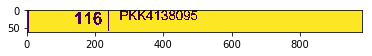

In [18]:
img=cv2.imread('Problem1/page-4/'+'box_8_1.jpg',0)
plt.imshow(img)
img.shape
cv2.imwrite('gray.jpg',img)

In [11]:
import scipy.misc as ms
ig=ms.imread('Problem1/page-4/'+'box_8_1.jpg')
ig.shape

(63, 982, 3)

True

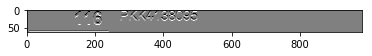

In [4]:
img=cv2.imread('Problem1/page-4/'+'box_8_1.jpg',0)
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)
plt.imshow(sobely,cmap='gray')
cv2.imwrite('df.jpg',sobely)

In [86]:
os.listdir('Problem1/page-4')

['box_1_0.jpg',
 'box_3_1.jpg',
 'box_2_1.jpg',
 'box_8_2.jpg',
 'box_7_1.jpg',
 'box_8_1.jpg',
 'box_8_0.jpg',
 'box_1_2.jpg',
 'box_0_1.jpg',
 'box_6_0.jpg',
 'box_5_0.jpg',
 'box_0_0.jpg',
 'box_2_0.jpg',
 'box_3_2.jpg',
 'box_4_0.jpg',
 'box_7_0.jpg',
 'box_0_2.jpg',
 'box_3_0.jpg',
 'box_5_1.jpg',
 'box_9_1.jpg',
 'box_9_0.jpg',
 'box_9_2.jpg',
 'box_7_2.jpg',
 'box_1_1.jpg',
 'box_6_2.jpg',
 'box_6_1.jpg',
 'box_4_2.jpg',
 'box_5_2.jpg',
 'box_2_2.jpg',
 'box_4_1.jpg']

In [85]:
ls

['94 \\ PKK3753100',
 '101 \\ PKK2989952',
 '98 \\ PKK3047545',
 'I 1 17 PKK2975282',
 '113 ‘ PKK3753126',
 'I 1 16 PKK4138095',
 '1 15 PKK3047487',
 '96 \\ PKK2976322',
 '92 PKK2975340',
 '109‘ PKK2973519',
 '106 ‘ PKK2989960',
 '91 PKK2973329',
 '97 \\ PKK2973584',
 '102 \\ PKK2973899',
 '103 ‘ PKK2975423',
 '112 ‘ PKK4138186',
 '93 PKK2973170',
 '100 ‘ PKK2973782',
 '107 ‘ PKK2971901',
 'I 1 19 PKK2975894',
 '1 18 PKK2975225',
 'I 120 PKK2975415',
 '114 ‘ PKK3029162',
 '95 \\ PKK3753118',
 '111 ‘ PKK3514452',
 '11o ‘ PKK2973634',
 '105 ‘ PKK3047826',
 '108 ‘ PKK2973303',
 '99 \\ PKK2973436',
 '104 ‘ PKK2975258']

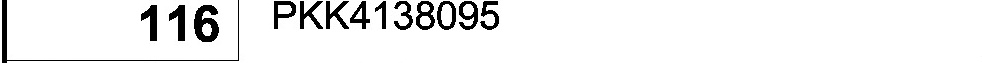

In [8]:
Image.open('Problem1/page-4/box_8_1.jpg')

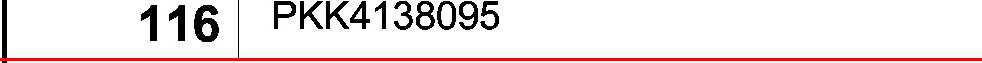

In [24]:
import cv2
import numpy as np

img = cv2.imread('Problem1/page-4/box_8_1.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,50,150,apertureSize = 3)

lines = cv2.HoughLines(edges,1,np.pi/180,10)
for rho,theta in lines[0]:
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))

    cv2.line(img,(x1,y1),(x2,y2),(0,0,255),2)

cv2.imwrite('houghlines3.jpg',img)
Image.open('houghlines3.jpg')

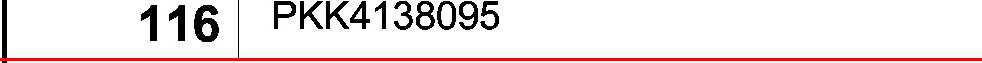

In [21]:
Image.open('houghlines3.jpg')

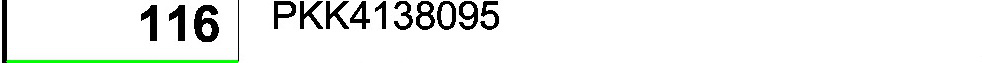

In [26]:
import cv2
import numpy as np

img = cv2.imread('Problem1/page-4/box_8_1.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,50,150,apertureSize = 3)
minLineLength = 100
maxLineGap = 10
lines = cv2.HoughLinesP(edges,1,np.pi/180,100,minLineLength,maxLineGap)
for x1,y1,x2,y2 in lines[0]:
    cv2.line(img,(x1,y1),(x2,y2),(0,255,0),2)

cv2.imwrite('houghlines5.jpg',img)
Image.open('houghlines5.jpg')

In [14]:
def convert(w,h):
    W=(3306/999)*w
    H=(3306/999)*h
    return W,H

    

In [92]:
os.listdir('Problem1')

['page-13.jpg',
 'page-4.jpg',
 'page-4',
 'page-27.jpg',
 'page-8.jpg',
 'page-35.jpg']

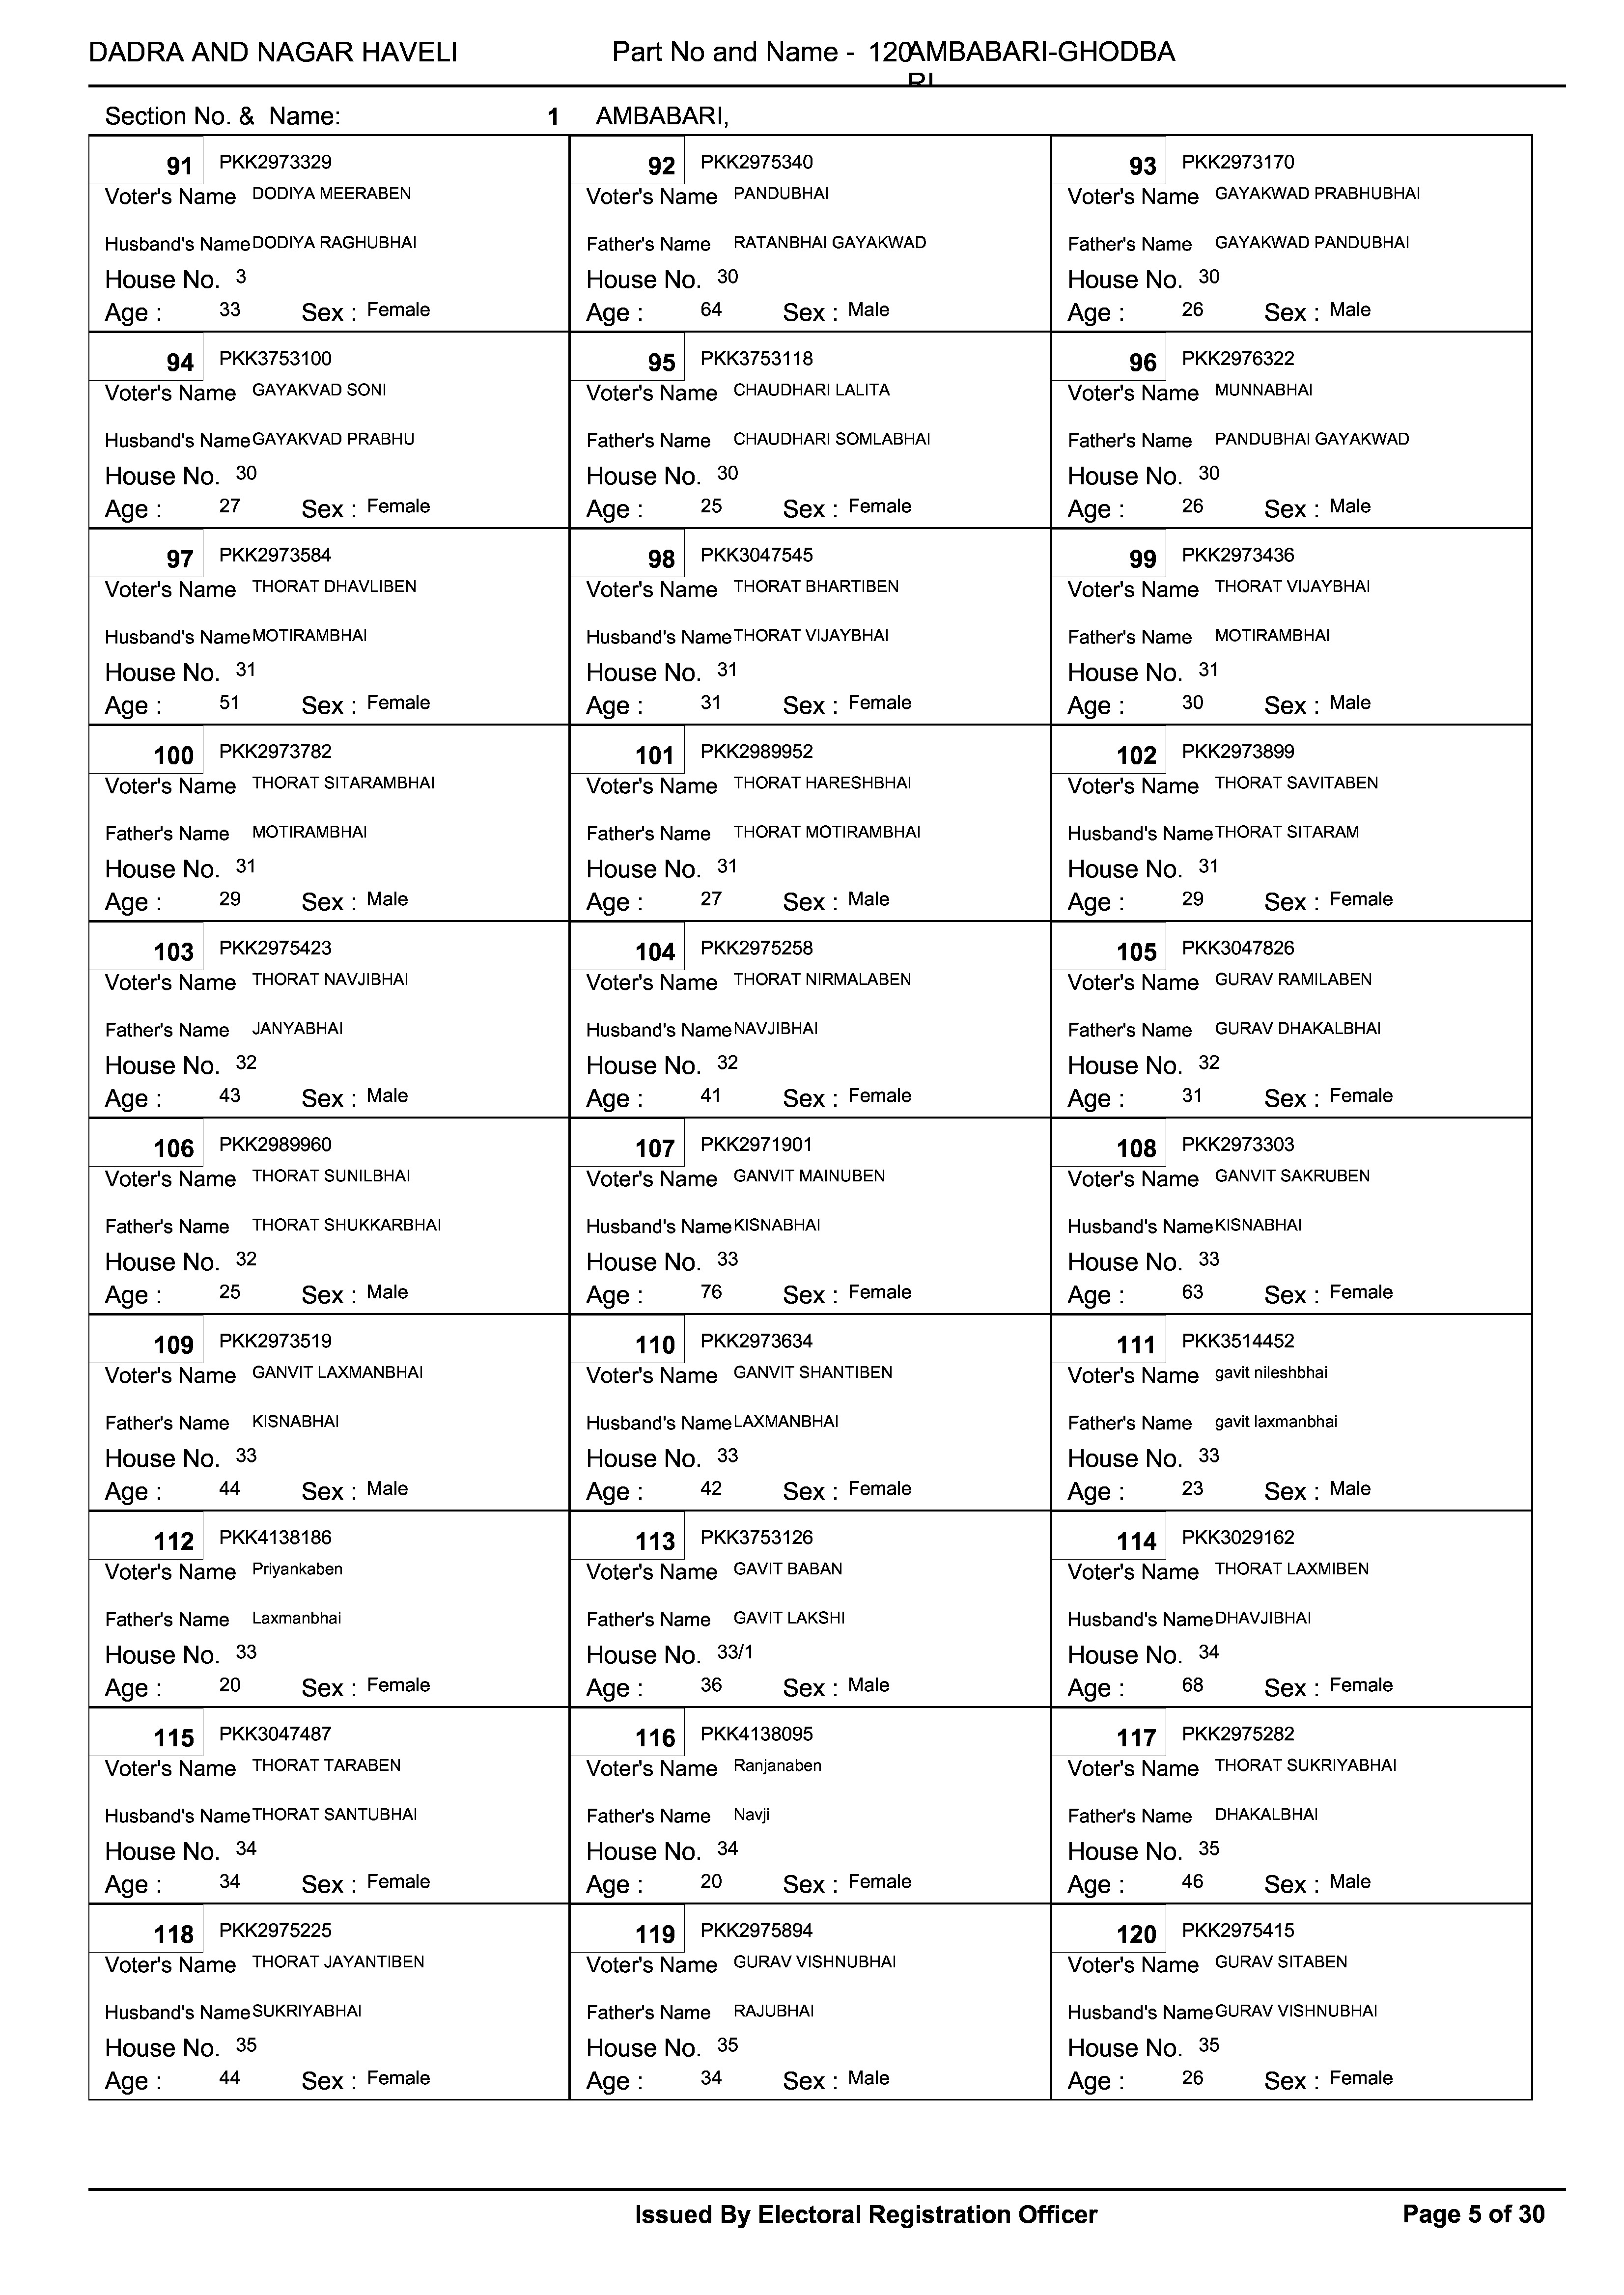

In [103]:
Image.open('Problem1/page-4.jpg')

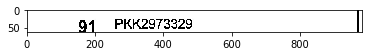

In [9]:
img=cv2.imread('Problem1/page-4.jpg')
crp=img[290:290+63,190:190+982]
cv2.imwrite('resize.jpg',crp)
plt.imshow(crp)

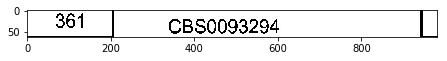

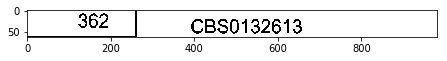

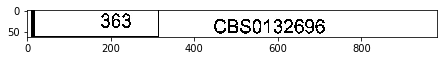

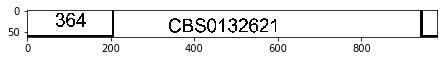

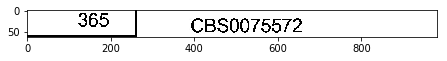

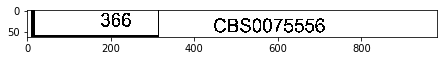

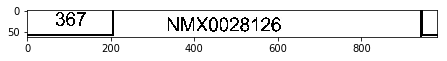

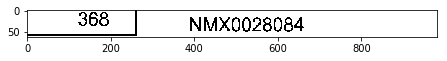

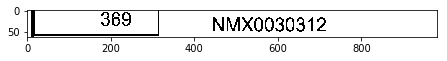

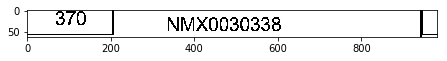

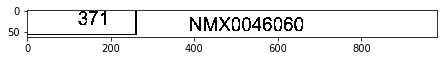

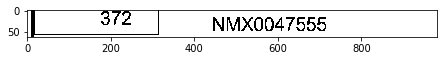

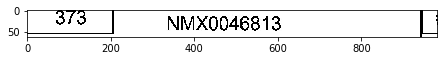

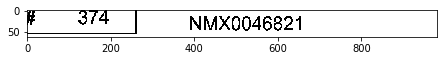

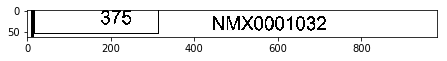

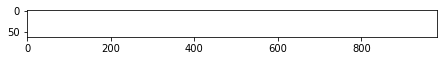

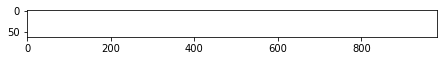

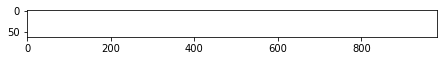

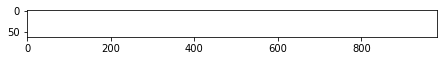

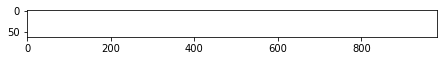

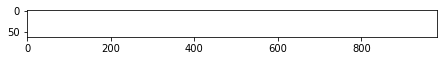

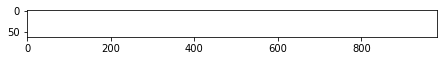

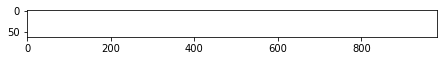

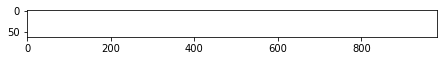

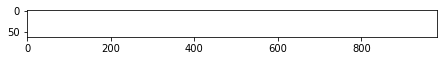

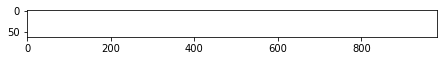

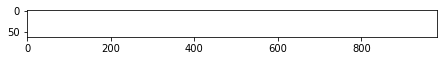

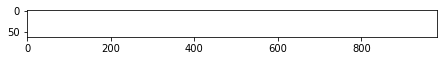

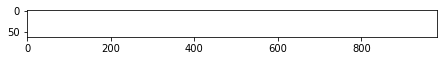

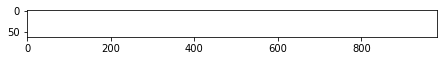

In [29]:
w=190
h=290
k=1
for i in range(10):
    for j in range(3):
        img=cv2.imread('Problem1/page-13.jpg')
        crp=img[h:h+63,w:w+982]
        cv2.imwrite('Problem1/page-5/box_'+str(i)+'_'+str(j)+'.jpg',crp)
        plt.figure(figsize=(25,25))
        plt.subplot(10,3,k)
        plt.imshow(crp)
        plt.show()
        w+=982
        k+=1
    w=190
    h+=63+340
    
    

646

In [32]:
convert(19,297)

(62.87687687687687, 982.8648648648648)

In [26]:
1155+982

2137

In [27]:
os.mkdir('Problem1/page-4')